<a href="https://colab.research.google.com/github/promckkon/MK-DCNN/blob/main/HSPSO_CWRU_26216.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import catboost
import sklearn

print("numpy:", np.__version__)
print("catboost:", catboost.__version__)
print("sklearn:", sklearn.__version__)


numpy: 1.26.4
catboost: 1.2.7
sklearn: 1.6.1


In [3]:
!pip -q uninstall -y catboost
!pip -q install -U "numpy==1.26.4"
!pip -q install --no-cache-dir --force-reinstall "catboost==1.2.7"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 145.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 193.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 230.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 197.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 199.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 230.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3

In [4]:
import scipy.io
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

Dataset Input

In [5]:
df=pd.DataFrame(columns=['DE_data','fault']) # upload the dataset on googledrive

for root, dirs, files in os.walk("/content/drive/MyDrive/CWRU_with_NOISE/CWRU_2", topdown=False):
    for file_name in files:
        path = os.path.join(root, file_name)
        print(path)

        mat = scipy.io.loadmat(path)

        key_name = list(mat.keys())[3]
        DE_data = mat.get(key_name)
        fault = np.full((len(DE_data), 1), file_name[:-4])

        df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) , 'fault':np.ravel(fault)})

        df = pd.concat([df,df_temp],axis=0)
        print(df['fault'].unique())

df.to_csv('/content/drive/MyDrive/MK-DCNN CWRU/NOISE_0_faults.csv',index=False)

/content/drive/MyDrive/CWRU_with_NOISE/CWRU_2/F0_Normal.mat
['F0_Normal']
/content/drive/MyDrive/CWRU_with_NOISE/CWRU_2/F1_BallFault_7.mat
['F0_Normal' 'F1_BallFault_7']
/content/drive/MyDrive/CWRU_with_NOISE/CWRU_2/F2_BallFault_14.mat
['F0_Normal' 'F1_BallFault_7' 'F2_BallFault_14']
/content/drive/MyDrive/CWRU_with_NOISE/CWRU_2/F3_BallFault_21.mat
['F0_Normal' 'F1_BallFault_7' 'F2_BallFault_14' 'F3_BallFault_21']
/content/drive/MyDrive/CWRU_with_NOISE/CWRU_2/F4_InnerRaceFault_7.mat
['F0_Normal' 'F1_BallFault_7' 'F2_BallFault_14' 'F3_BallFault_21'
 'F4_InnerRaceFault_7']
/content/drive/MyDrive/CWRU_with_NOISE/CWRU_2/F5_InnerRaceFault_14.mat
['F0_Normal' 'F1_BallFault_7' 'F2_BallFault_14' 'F3_BallFault_21'
 'F4_InnerRaceFault_7' 'F5_InnerRaceFault_14']
/content/drive/MyDrive/CWRU_with_NOISE/CWRU_2/F6_InnerRaceFault_21.mat
['F0_Normal' 'F1_BallFault_7' 'F2_BallFault_14' 'F3_BallFault_21'
 'F4_InnerRaceFault_7' 'F5_InnerRaceFault_14' 'F6_InnerRaceFault_21']
/content/drive/MyDrive/CWRU_wit

# Multi-Kernel Deep 1D-CNN

In [6]:
pip install tensorflow

In [7]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


# Total target rows
TARGET_ROWS = 1800

# Estimate the total number of samples across all fault types
total_samples = sum(len(df[df['fault'] == f]) for f in df['fault'].unique())

# Calculate suitable window size and stride
num_faults = 9
average_samples_per_fault = total_samples / num_faults
approx_windows_per_fault = TARGET_ROWS / num_faults
stride_ratio = 0.8  # Initial stride/window ratio

win_len = int(average_samples_per_fault / approx_windows_per_fault)
stride = int(win_len * stride_ratio)

X=[]
Y=[]


for k in df['fault'].unique():

    df_temp_2 = df[df['fault']==k]

    for i in np.arange(0,len(df_temp_2)-(win_len),stride):
        temp = df_temp_2.iloc[i:i+win_len,:-1].values
        temp = temp.reshape((1,-1))
        X.append(temp)
        Y.append(df_temp_2.iloc[i+win_len,-1])

X=np.array(X)
X=X.reshape((X.shape[0],-1,1))
#X = np.repeat(X, 3, axis=3) # To repeat into 3 chanel format


Y=np.array(Y)
encoder= LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
OHE_Y = to_categorical(encoded_Y)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,OHE_Y,test_size=0.3,shuffle=True)

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, concatenate
from tensorflow.keras import backend as K

# --- Custom Physics-Informed Loss Function ---
def custom_loss(y_true, y_pred):
    # Standard categorical crossentropy
    loss = K.categorical_crossentropy(y_true, y_pred)

    # Physics-Informed Term: penalize rapid class probability changes
    # Ensure y_pred is at least 2D for slicing
    if K.ndim(y_pred) < 2:
        y_pred = K.expand_dims(y_pred, axis=-1)

    # Ensure y_pred has more than one class dimension to compute diff
    if K.int_shape(y_pred)[-1] > 1:
        diff = y_pred[:, 1:] - y_pred[:, :-1]
        squared_diff = tf.square(diff)
        physics_term = tf.reduce_mean(squared_diff)
    else:
        physics_term = 0.0 # No physics term if only one class


    # Total loss = classification loss + regularization term
    total_loss = loss + 0.01 * physics_term  # 0.01 is tunable

    return total_loss

# --- Model Definition ---
# no_classes = len(df['fault'].unique()) # Original line that caused 10 classes
no_classes = len(encoder.classes_) # Use the encoder to get the correct number of classes
print(f"Number of output classes (no_classes): {no_classes}") # Add print statement to verify

input_shape = (X.shape[1], X.shape[2])  # Example: (784, 1)

# Head 1
inputs1 = Input(shape=input_shape)
conv1 = Conv1D(filters=64, kernel_size=200, activation='relu')(inputs1)
drop1 = Dropout(0.5)(conv1)
pool1 = MaxPooling1D(pool_size=20)(drop1)
flat1 = Flatten()(pool1)

# Head 2
inputs2 = Input(shape=input_shape)
conv2 = Conv1D(filters=64, kernel_size=100, activation='relu')(inputs2)
drop2 = Dropout(0.5)(conv2)
pool2 = MaxPooling1D(pool_size=10)(drop2)
flat2 = Flatten()(pool2)

# Head 3
inputs3 = Input(shape=input_shape)
conv3 = Conv1D(filters=64, kernel_size=50, activation='relu')(inputs3)
drop3 = Dropout(0.5)(conv3)
pool3 = MaxPooling1D(pool_size=5)(drop3)
flat3 = Flatten()(pool3)

# Merge all feature paths
merged = concatenate([flat1, flat2, flat3])

# Fully connected interpretation
dense1 = Dense(100, activation='relu')(merged)
outputs = Dense(no_classes, activation='softmax')(dense1)

# Build and compile model with custom loss
cnn_model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
cnn_model.compile(optimizer='adam', loss=custom_loss, metrics=['accuracy'])

# Model summary
cnn_model.summary()

Number of output classes (no_classes): 10


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 2706, 1)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 2706, 1)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 2706, 1)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 2507, 64)  │     12,864 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 2607, 64)  │      6,464 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 2657, 64)  │      3,264 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 2507, 64)  │          0 │ conv1d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 2607, 64)  │          0 │ conv1d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 2657, 64)  │          0 │ conv1d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 125, 64)   │          0 │ dropout[0][0]     │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 260, 64)   │          0 │ dropout_1[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 531, 64)   │          0 │ dropout_2[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 8000)      │          0 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 16640)     │          0 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 33984)     │          0 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 58624)     │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0],  │
│                     │                   │            │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 100)       │  5,862,500 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 10)        │      1,010 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,886,102 (22.45 MB)

 Trainable params: 5,886,102 (22.45 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
batch_size =100
epochs = 20

# Explicitly convert X_train and X_test to a numeric dtype if they are object dtype
# This addresses the ValueError: Invalid dtype: object
if X_train.dtype == 'object':
    X_train = X_train.astype(np.float32)
if X_test.dtype == 'object':
    X_test = X_test.astype(np.float32)

history = cnn_model.fit([X_train,X_train,X_train], y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=([X_test,X_test,X_test],y_test),shuffle=True)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.1252 - loss: 4.6220 - val_accuracy: 0.2288 - val_loss: 1.9095
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.3366 - loss: 1.6834 - val_accuracy: 0.3507 - val_loss: 1.6631
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4530 - loss: 1.3776 - val_accuracy: 0.3982 - val_loss: 1.4644
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5385 - loss: 1.1260 - val_accuracy: 0.6360 - val_loss: 1.2189
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7367 - loss: 0.8459 - val_accuracy: 0.8202 - val_loss: 0.9265
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8866 - loss: 0.5831 - val_accuracy: 0.8648 - val_loss: 0.7003
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9369 - loss: 0.3841 - val_accuracy: 0.8796 - val_loss: 0.5665
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9733 - loss: 0.2089 - val_accuracy: 0.9108 - va

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step


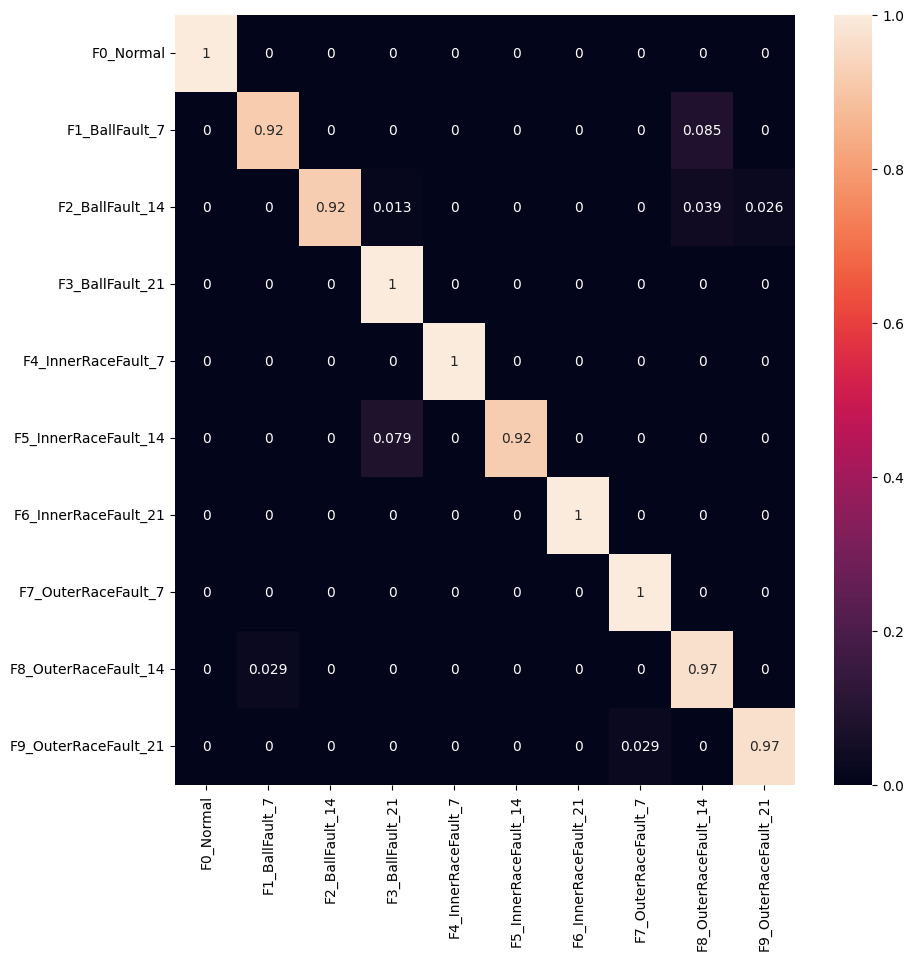

In [11]:
def inv_Transform_result(y_pred):
    y_pred = y_pred.argmax(axis=1)
    y_pred = encoder.inverse_transform(y_pred)
    return y_pred



y_pred=cnn_model.predict([X_test,X_test,X_test])


Y_pred=inv_Transform_result(y_pred)
Y_test = inv_Transform_result(y_test)




from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10,10))
cm = confusion_matrix(Y_test, Y_pred,normalize='true')
f = sns.heatmap(cm, annot=True,xticklabels=encoder.classes_,yticklabels=encoder.classes_)

In [12]:
dummy_cnn = Model(inputs=cnn_model.input,outputs=cnn_model.layers[16].output)
y_viz = dummy_cnn.predict([X_train,X_train,X_train])

50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7845281165c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/ctypes/__init__.py", line 379, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error
Exception ignored on calling ctypes callback function: <functio

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1570 samples in 0.001s...
[t-SNE] Computed neighbors for 1570 samples in 0.263s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1570
[t-SNE] Computed conditional probabilities for sample 1570 / 1570
[t-SNE] Mean sigma: 1.398983
[t-SNE] Computed conditional probabilities in 0.168s
[t-SNE] Iteration 50: error = 56.4124527, gradient norm = 0.0420724 (50 iterations in 0.952s)
[t-SNE] Iteration 100: error = 51.5007820, gradient norm = 0.0153443 (50 iterations in 0.728s)
[t-SNE] Iteration 150: error = 50.2770844, gradient norm = 0.0094496 (50 iterations in 0.710s)
[t-SNE] Iteration 200: error = 49.6982727, gradient norm = 0.0069103 (50 iterations in 0.557s)
[t-SNE] Iteration 250: error = 49.3475990, gradient norm = 0.0053261 (50 iterations in 0.474s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.347599
[t-SNE] Iteration 300: error = 0.8626166, gradient norm = 0.0159658 (50 iterations in 0.498s

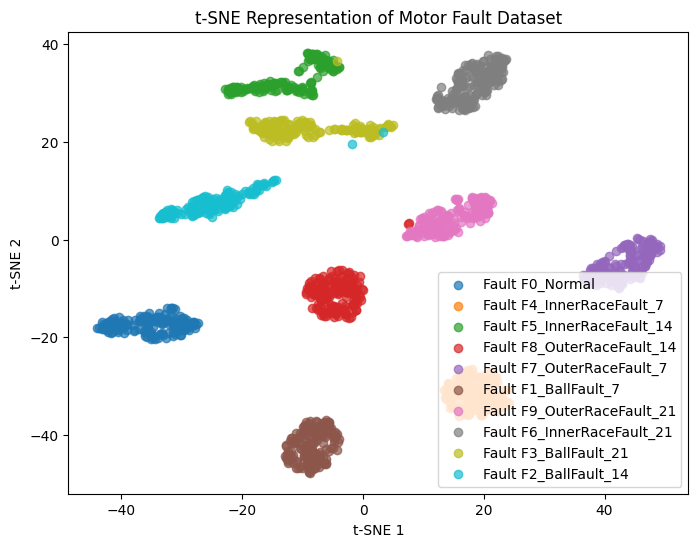

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Apply t-SNE transformation
X_t_sne = TSNE(
    n_components=2,
    learning_rate='auto',
    verbose=2,  # Increase verbosity for more detailed feedback
    perplexity=40
).fit_transform(y_viz)

# Create DataFrame for t-SNE components
tSNEdf = pd.DataFrame(data=X_t_sne, columns=['T-SNE component 1', 'T-SNE component 2'])

# Assuming `inv_Transform_result` transforms `y_train` to get the Fault labels
tSNEdf['Fault'] = inv_Transform_result(y_train)

# Save the t-SNE DataFrame as a CSV file
tSNEdf.to_csv('/content/drive/MyDrive/MK-DCNN CWRU/NNOISE_0_tSNE_results.csv', index=True)
print("t-SNE results saved as '/content/drive/MyDrive/MK-DCNN CWRU/NNOISE_0_tSNE_results.csv'.")

# # Plot the t-SNE results with Fault as hue
# plt.figure(figsize=(12, 12))  # Larger figure for clarity
# sns.scatterplot(
#     x='T-SNE component 1',
#     y='T-SNE component 2',
#     hue='Fault',
#     palette=sns.color_palette("husl", as_cmap=False),  # Vivid color palette
#     data=tSNEdf,
#     legend="full",
#     alpha=0.7,  # Increased transparency for better overlap clarity
#     s=100  # Larger marker size
# )

# # Add gridlines for better visualization
# plt.grid


# Optional: Visualization of t-SNE representation
plt.figure(figsize=(8, 6))
for label in tSNEdf['Fault'].unique():
    subset = tSNEdf[tSNEdf['Fault'] == label]
    plt.scatter(subset['T-SNE component 1'], subset['T-SNE component 2'], label=f'Fault {label}', alpha=0.7)

plt.title('t-SNE Representation of Motor Fault Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()

Statistical Features

In [14]:
import numpy as np
from scipy.stats import skew, kurtosis
import pandas as pd
import matplotlib.pyplot as plt

# Total target rows
TARGET_ROWS = 1800

# Estimate the total number of samples across all fault types
total_samples = sum(len(df[df['fault'] == f]) for f in df['fault'].unique())

# Calculate suitable window size and stride
num_faults = 9
average_samples_per_fault = total_samples / num_faults
approx_windows_per_fault = TARGET_ROWS / num_faults
stride_ratio = 0.8  # Initial stride/window ratio

WINDOW_SIZE = int(average_samples_per_fault / approx_windows_per_fault)
STRIDE = int(WINDOW_SIZE * stride_ratio)

print(f"Calculated WINDOW_SIZE: {WINDOW_SIZE}, STRIDE: {STRIDE}")

# Initialize a list to store statistical features
statistical_features = []

# Loop through each fault type
for f in df['fault'].unique():
    # Extract data for the current fault type
    # Convert to NumPy array for efficiency and ensure float type
    fault_data = df[df['fault'] == f].iloc[:, 0].values.astype(float)

    # Compute windows using sliding window approach
    num_windows = (len(fault_data) - WINDOW_SIZE) // STRIDE + 1
    for i in range(num_windows):
        start = i * STRIDE
        end = start + WINDOW_SIZE
        window = fault_data[start:end]

        # Compute statistical features for the current window
        mean_val = np.mean(window)
        std_val = np.std(window)
        rms_val = np.sqrt(np.mean(np.square(window)))
        max_val = np.max(window)
        min_val = np.min(window)
        skewness_val = skew(window)
        kurtosis_val = kurtosis(window)

        # Additional statistical features
        mean_abs_val = np.mean(np.abs(window))
        form_factor = rms_val / mean_abs_val if mean_abs_val != 0 else 0
        crest_factor = max_val / rms_val if rms_val != 0 else 0

        # Store the features in a dictionary
        statistical_features.append({
            'fault': f,
            'window': i + 1,
            'mean': mean_val,
            'std': std_val,
            'rms': rms_val,
            'max': max_val,
            'min': min_val,
            'skewness': skewness_val,
            'kurtosis': kurtosis_val,
            'form_factor': form_factor,
            'crest_factor': crest_factor
        })

# Convert statistical features into a DataFrame
stat_features_df = pd.DataFrame(statistical_features)

# Display the extracted features and count of rows
print(f"Extracted {len(stat_features_df)} rows (target: {TARGET_ROWS})")
print(stat_features_df)

# Save the extracted features to a CSV file
output_file = "/content/drive/MyDrive/MK-DCNN CWRU/NNOISE_0_statistical_features_with_form_and_crest_factors.csv"
stat_features_df.to_csv(output_file, index=False)
print(f"Statistical features saved to '{output_file}'.")

Calculated WINDOW_SIZE: 2706, STRIDE: 2164
Extracted 2243 rows (target: 1800)
                     fault  window      mean       std       rms       max  \
0                F0_Normal       1  0.008517  0.064628  0.065187  0.204443   
1                F0_Normal       2  0.009602  0.063451  0.064174  0.204860   
2                F0_Normal       3  0.010599  0.064361  0.065228  0.211327   
3                F0_Normal       4  0.012741  0.064404  0.065652  0.211536   
4                F0_Normal       5  0.012252  0.061830  0.063032  0.186919   
...                    ...     ...       ...       ...       ...       ...   
2238  F9_OuterRaceFault_21     221  0.013152  0.649244  0.649378  4.648259   
2239  F9_OuterRaceFault_21     222  0.012568  0.536755  0.536902  4.377827   
2240  F9_OuterRaceFault_21     223  0.013174  0.685940  0.686067  5.076443   
2241  F9_OuterRaceFault_21     224  0.014050  0.626737  0.626894  3.700912   
2242  F9_OuterRaceFault_21     225  0.011118  0.415185  0.415334

In [15]:
import pandas as pd
from sklearn.utils import resample

# Load your dataset (replace 'your_dataset.csv' with your actual file)
df = pd.read_csv('/content/drive/MyDrive/MK-DCNN CWRU/NNOISE_0_statistical_features_with_form_and_crest_factors.csv')

# Display initial class distribution
print("Initial class distribution:")
print(df['fault'].value_counts())

# Target size for undersampling/resampling
TARGET_ROWS = 1570

# Separate all fault types
fault_classes = df['fault'].value_counts()

# Determine the number of classes
num_classes = len(fault_classes)

# Calculate how many samples to take from each class
samples_per_class = TARGET_ROWS // num_classes

# Initialize a list to store resampled data
resampled_data = []

# Loop over each class to resample them
for fault_class in fault_classes.index:
    class_data = df[df['fault'] == fault_class]
    if len(class_data) > samples_per_class:
        # Undersample
        class_data_resampled = resample(class_data, replace=False, n_samples=samples_per_class, random_state=42)
    else:
        # Upsample
        class_data_resampled = resample(class_data, replace=True, n_samples=samples_per_class, random_state=42)

    resampled_data.append(class_data_resampled)

# Concatenate the resampled data into a single DataFrame
balanced_df = pd.concat(resampled_data)

# Check if we have the exact number of rows
current_rows = len(balanced_df)
print(f"Current rows after equal resampling: {current_rows}")

# If the current rows don't match the target rows, adjust by trimming or adding rows
if current_rows > TARGET_ROWS:
    # Trim extra rows (if more than target)
    balanced_df = balanced_df.head(TARGET_ROWS)
elif current_rows < TARGET_ROWS:
    # Add rows if fewer than target, by sampling from existing data
    remaining_rows = TARGET_ROWS - current_rows
    additional_data = balanced_df.sample(n=remaining_rows, replace=True, random_state=42)
    balanced_df = pd.concat([balanced_df, additional_data])

# Shuffle the final dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display new class distribution
print("New class distribution:")
print(balanced_df['fault'].value_counts())

# Display final row count
print(f"Final row count: {len(balanced_df)}")

# Save the balanced dataset to a CSV file
balanced_df.to_csv("/content/drive/MyDrive/MK-DCNN CWRU/NNOISE_0_balanced_dataset_equal_resampling_exact_1570.csv", index=False)
print("Balanced dataset saved as '/content/drive/MyDrive/MK-DCNN CWRU/NNOISE_0_balanced_dataset_equal_resampling_exact_1570.csv'")


Initial class distribution:
fault
F6_InnerRaceFault_21    226
F5_InnerRaceFault_14    225
F9_OuterRaceFault_21    225
F1_BallFault_7          224
F2_BallFault_14         224
F3_BallFault_21         224
F4_InnerRaceFault_7     224
F7_OuterRaceFault_7     224
F8_OuterRaceFault_14    224
F0_Normal               223
Name: count, dtype: int64
Current rows after equal resampling: 1570
New class distribution:
fault
F0_Normal               157
F4_InnerRaceFault_7     157
F9_OuterRaceFault_21    157
F7_OuterRaceFault_7     157
F3_BallFault_21         157
F1_BallFault_7          157
F6_InnerRaceFault_21    157
F5_InnerRaceFault_14    157
F2_BallFault_14         157
F8_OuterRaceFault_14    157
Name: count, dtype: int64
Final row count: 1570
Balanced dataset saved as '/content/drive/MyDrive/MK-DCNN CWRU/NNOISE_0_balanced_dataset_equal_resampling_exact_1570.csv'


In [16]:
balanced_df.shape

(1570, 11)

In [17]:
balanced_df=balanced_df.sort_values(by='fault')

In [18]:
balanced_df

,fault,window,mean,std,rms,max,min,skewness,kurtosis,form_factor,crest_factor
0,F0_Normal,43,0.009751,0.065139,0.065864,0.212996,-0.215708,-0.274433,-0.045461,1.236035,3.233858
6,F0_Normal,155,0.013568,0.065771,0.067156,0.195681,-0.223844,-0.279285,0.122092,1.254285,2.913841
8,F0_Normal,162,0.015803,0.063472,0.065410,0.194847,-0.242828,-0.274544,0.086196,1.240071,2.978856
18,F0_Normal,99,0.014886,0.062857,0.064595,0.204860,-0.170856,-0.033985,-0.097417,1.253608,3.171445
21,F0_Normal,7,0.010991,0.066608,0.067509,0.200062,-0.211536,-0.133130,-0.153008,1.242956,2.963481
...,...,...,...,...,...,...,...,...,...,...,...
1541,F9_OuterRaceFault_21,40,0.013484,0.737223,0.737346,6.864299,-6.411909,-0.367552,29.540443,2.335402,9.309467
1546,F9_OuterRaceFault_21,136,0.014911,0.520936,0.521149,3.901232,-4.596509,-1.108043,23.892289,2.017932,7.485829
1550,F9_OuterRaceFault_21,105,0.014970,0.688700,0.688863,5.321835,-4.927037,0.042281,15.130786,1.892572,7.725534
1559,F9_OuterRaceFault_21,61,0.015927,0.570544,0.570766,4.381165,-5.046395,-0.733240,24.006356,2.147246,7.675934


     t-SNE 1    t-SNE 2      fault
0  21.031197 -26.785013  F0_Normal
1  34.740330  26.228348  F0_Normal
2  37.951035  26.610281  F0_Normal
3  38.448036   0.840126  F0_Normal
4  21.977888 -22.980743  F0_Normal


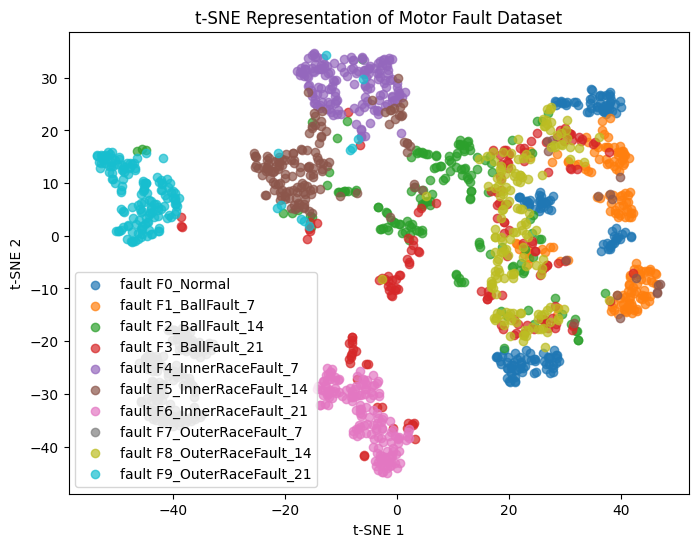

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# Sort the dataset by the 'Fault' column
balanced_df = balanced_df.sort_values(by='fault')

# Separate features and target variable
X = balanced_df.drop(columns=['fault'])  # Replace 'Fault' with actual target column name
y = balanced_df['fault']

# Normalize the feature columns using StandardScaler
scaler = StandardScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Concatenate the normalized features with the target variable
STAT_Motor_Fault_dataset_normalized = pd.concat([X_normalized, y.reset_index(drop=True)], axis=1)

# Sort the normalized dataset by 'Fault' column
STAT_Motor_Fault_dataset_normalized = STAT_Motor_Fault_dataset_normalized.sort_values(by='fault')

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)  # 2D t-SNE
X_tsne = tsne.fit_transform(X_normalized)

# Create a DataFrame for t-SNE results
tSNE_representation = pd.DataFrame(X_tsne, columns=['t-SNE 1', 't-SNE 2'])
tSNE_representation['fault'] = y.reset_index(drop=True)

# Display the t-SNE representation
print(tSNE_representation.head())

# Optional: Visualization of t-SNE representation
plt.figure(figsize=(8, 6))
for label in tSNE_representation['fault'].unique():
    subset = tSNE_representation[tSNE_representation['fault'] == label]
    plt.scatter(subset['t-SNE 1'], subset['t-SNE 2'], label=f'fault {label}', alpha=0.7)

plt.title('t-SNE Representation of Motor Fault Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()


In [20]:
tSNE_representation

,t-SNE 1,t-SNE 2,fault
0,21.031197,-26.785013,F0_Normal
1,34.740330,26.228348,F0_Normal
2,37.951035,26.610281,F0_Normal
3,38.448036,0.840126,F0_Normal
4,21.977888,-22.980743,F0_Normal
...,...,...,...
1565,-50.055351,0.853963,F9_OuterRaceFault_21
1566,-51.590691,15.988619,F9_OuterRaceFault_21
1567,-45.518002,1.767906,F9_OuterRaceFault_21
1568,-52.810356,13.788234,F9_OuterRaceFault_21


In [21]:
tSNE_representation=tSNE_representation.drop(columns=['fault'])
tSNE_representation

,t-SNE 1,t-SNE 2
0,21.031197,-26.785013
1,34.740330,26.228348
2,37.951035,26.610281
3,38.448036,0.840126
4,21.977888,-22.980743
...,...,...
1565,-50.055351,0.853963
1566,-51.590691,15.988619
1567,-45.518002,1.767906
1568,-52.810356,13.788234


In [22]:
tSNEdf = tSNEdf.sort_values(by='Fault')

In [23]:
tSNEdf

,T-SNE component 1,T-SNE component 2,Fault
0,-39.862106,-16.996817,F0_Normal
24,-30.333790,-15.676516,F0_Normal
42,-27.855276,-18.129862,F0_Normal
50,-28.379126,-17.135046,F0_Normal
61,-32.010235,-17.484224,F0_Normal
...,...,...,...
1523,19.007895,7.012906,F9_OuterRaceFault_21
1532,12.956281,5.721292,F9_OuterRaceFault_21
1545,15.042872,2.140237,F9_OuterRaceFault_21
1551,13.202366,3.417488,F9_OuterRaceFault_21


Combined Features

In [24]:
# import pandas as pd

# Assuming df1 and df2 are your two dataframes
# Concatenate the dataframes vertically
Motor_Fault_dataset = pd.concat([tSNE_representation, tSNEdf], axis=1)
Motor_Fault_dataset=Motor_Fault_dataset.sort_values(by='Fault')
Motor_Fault_dataset

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df1 and df2 are your two dataframes
# Concatenate the dataframes vertically
Motor_Fault_dataset = pd.concat([tSNE_representation, tSNEdf], axis=1)

# Sort the dataset by 'Fault' column
Motor_Fault_dataset = Motor_Fault_dataset.sort_values(by='Fault')
Motor_Fault_dataset


,t-SNE 1,t-SNE 2,T-SNE component 1,T-SNE component 2,Fault
0,21.031197,-26.785013,-39.862106,-16.996817,F0_Normal
24,41.808094,-0.258610,-30.333790,-15.676516,F0_Normal
42,24.624872,-23.470932,-27.855276,-18.129862,F0_Normal
50,24.623161,5.137980,-28.379126,-17.135046,F0_Normal
61,36.797680,-1.561152,-32.010235,-17.484224,F0_Normal
...,...,...,...,...,...
1523,-46.849537,13.730865,19.007895,7.012906,F9_OuterRaceFault_21
1532,-41.079113,3.286644,12.956281,5.721292,F9_OuterRaceFault_21
1545,-48.651970,12.968950,15.042872,2.140237,F9_OuterRaceFault_21
1551,-53.062016,12.782079,13.202366,3.417488,F9_OuterRaceFault_21


In [25]:
#Classification Report for MKDCNN

HSPSO-CatBoost


In [26]:
X = Motor_Fault_dataset.iloc[:, 0:4].values
y = Motor_Fault_dataset.iloc[:, 4].values

In [27]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical labels to numerical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state=42)

Deployment:

Tuning Duration: 0:01:08.411072
Best Val Accuracy: 0.996031746031746
Best Parameters: {'iterations': 100, 'depth': 3, 'learning_rate': 0.08, 'l2_leaf_reg': 1.0, 'bagging_temperature': 1.5, 'random_strength': 1.5}
0:	learn: 1.9747099	test: 1.9690051	best: 1.9690051 (0)	total: 2.01ms	remaining: 2.01s
50:	learn: 0.1353771	test: 0.1290044	best: 0.1290044 (50)	total: 92.9ms	remaining: 1.73s
100:	learn: 0.0490865	test: 0.0410318	best: 0.0410318 (100)	total: 192ms	remaining: 1.71s
150:	learn: 0.0286703	test: 0.0219151	best: 0.0219151 (150)	total: 285ms	remaining: 1.6s
200:	learn: 0.0195171	test: 0.0153976	best: 0.0153976 (200)	total: 374ms	remaining: 1.49s
250:	learn: 0.0145429	test: 0.0122767	best: 0.0122767 (250)	total: 465ms	remaining: 1.39s
300:	learn: 0.0110043	test: 0.0097509	best: 0.0097509 (300)	total: 551ms	remaining: 1.28s
350:	learn: 0.0087728	test: 0.0080307	best: 0.0080307 (350)	total: 639ms	remaining: 1.18s
400:	learn: 0.0071522	test: 0.0067068	best: 0.0067068 (400)	total: 730ms

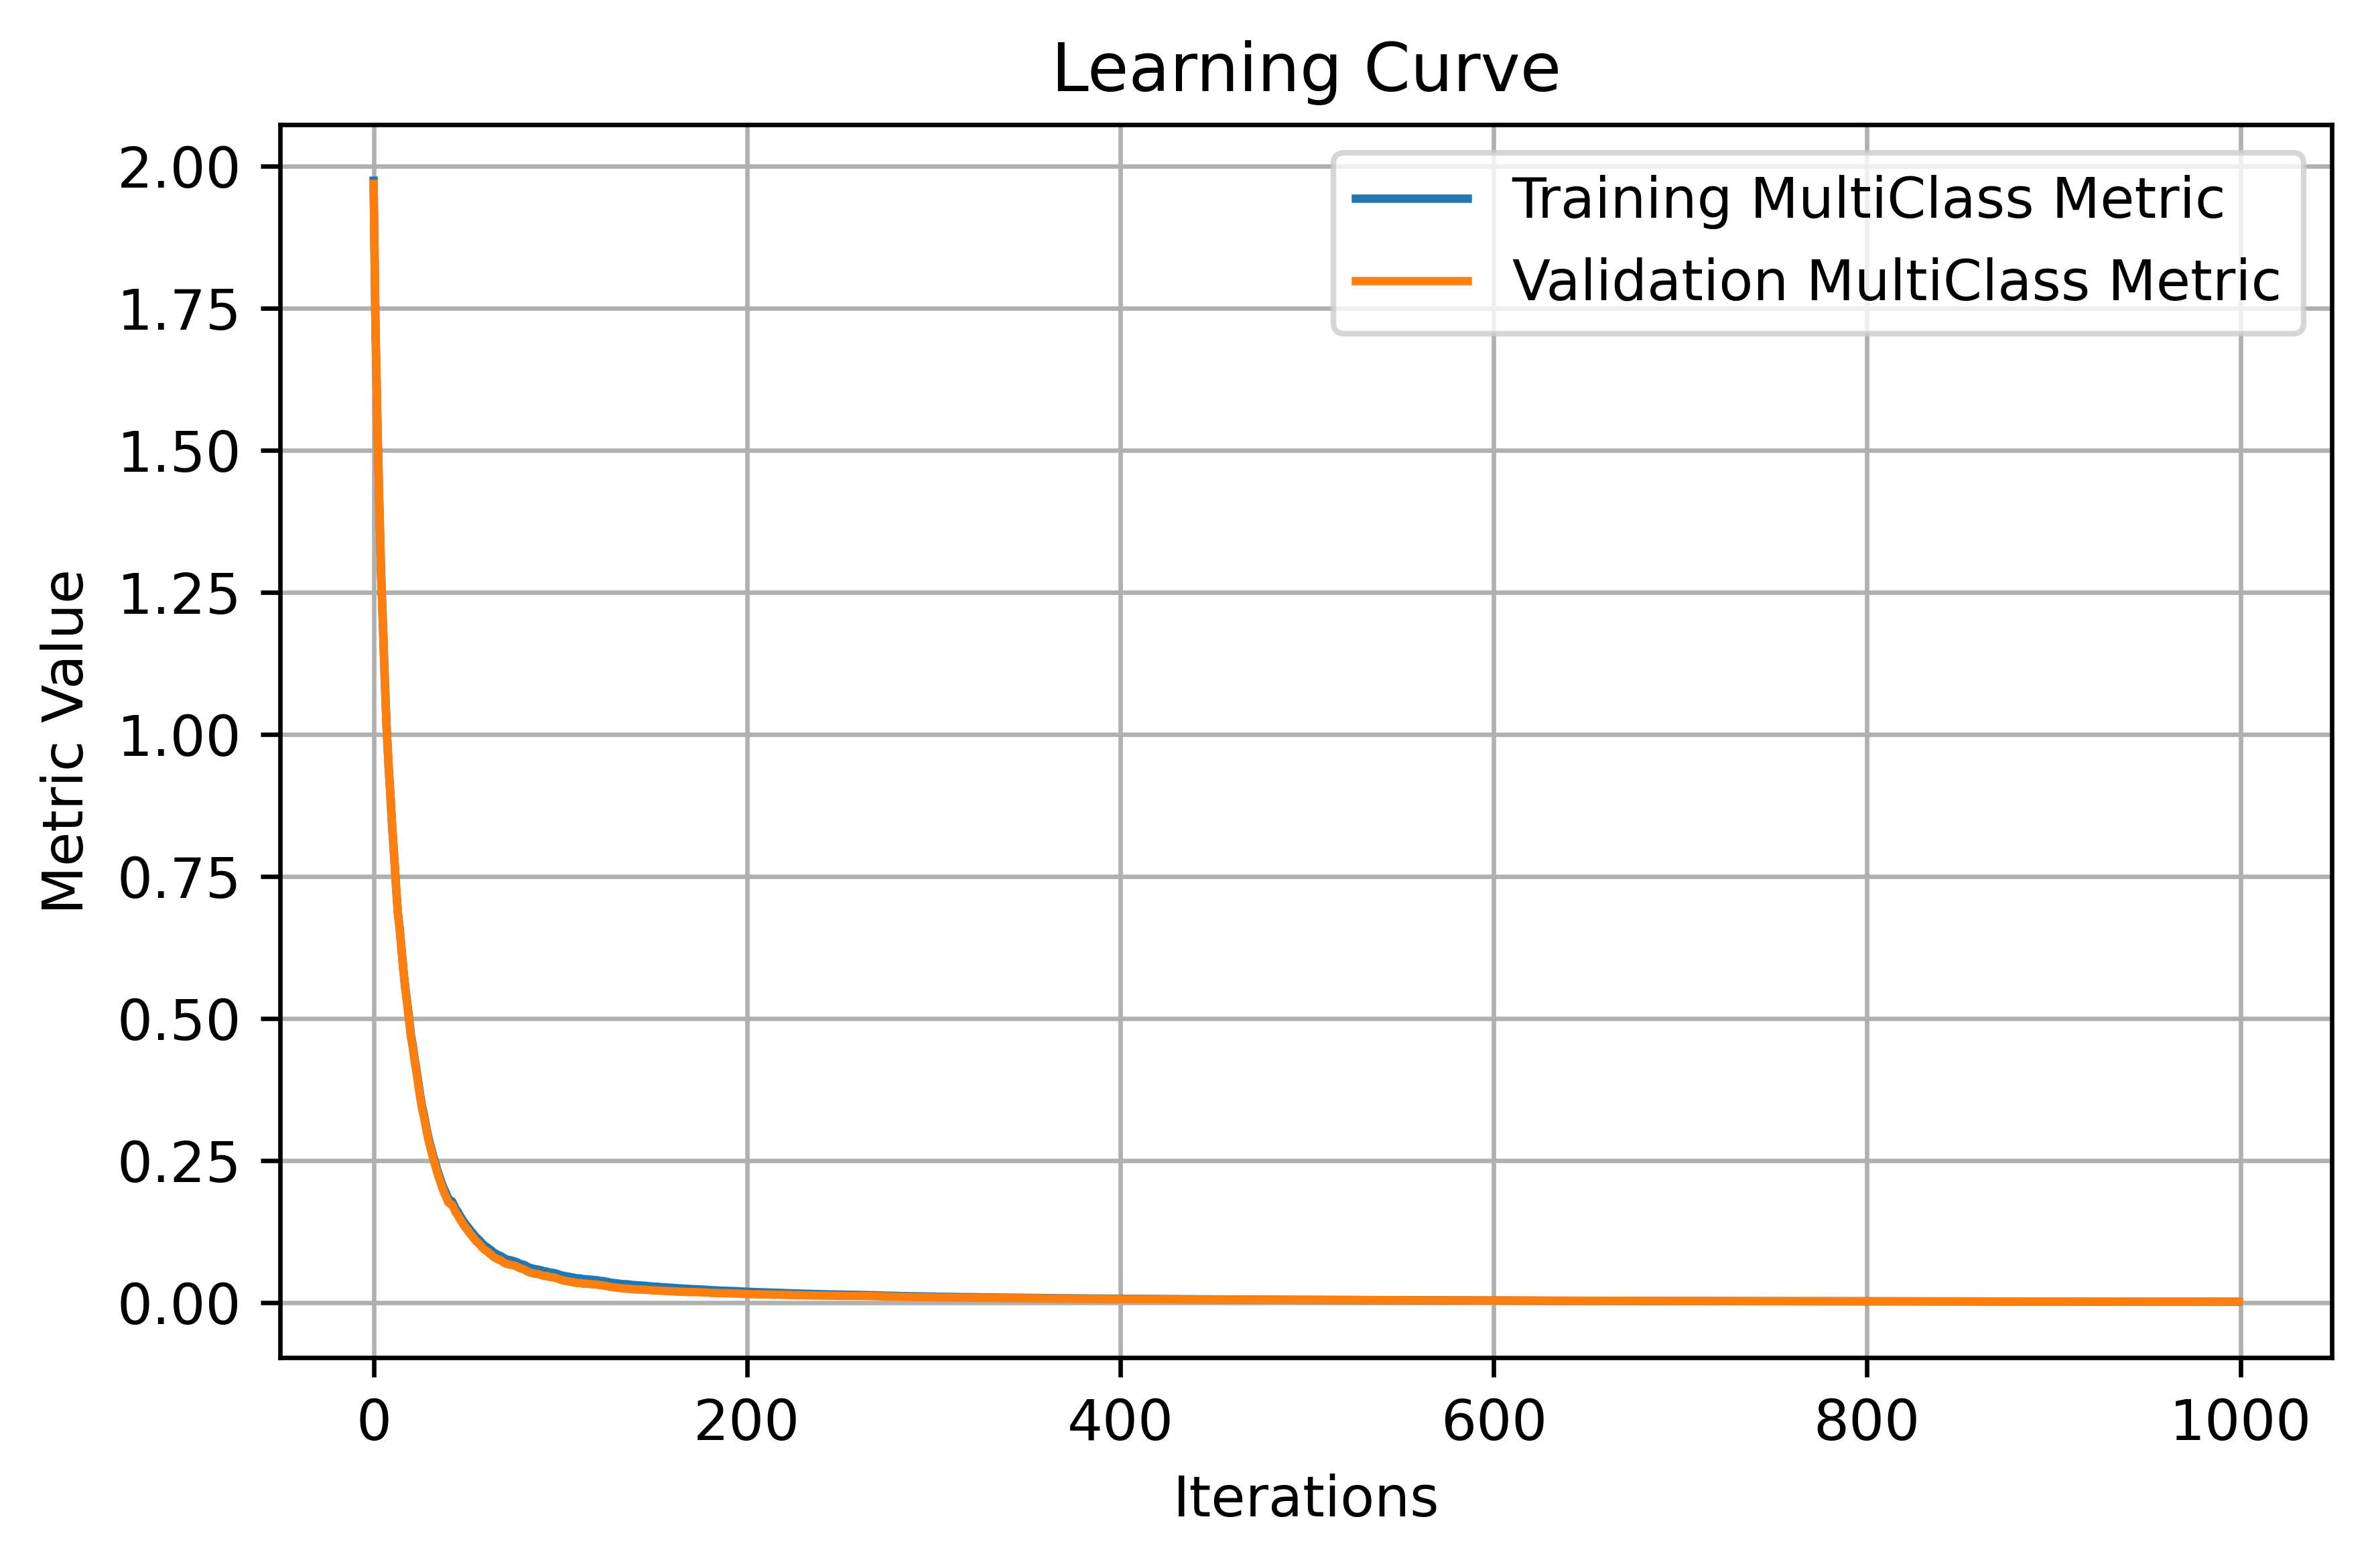

[Saved] /content/drive/MyDrive/HSPSO_metric_curve_1000.png
Classification Report - Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       119
           2       1.00      1.00      1.00       114
           3       1.00      1.00      1.00       122
           4       1.00      1.00      1.00       135
           5       1.00      1.00      1.00       121
           6       1.00      1.00      1.00       134
           7       1.00      1.00      1.00       128
           8       1.00      1.00      1.00       127
           9       1.00      1.00      1.00       125

    accuracy                           1.00      1256
   macro avg       1.00      1.00      1.00      1256
weighted avg       1.00      1.00      1.00      1256

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
 

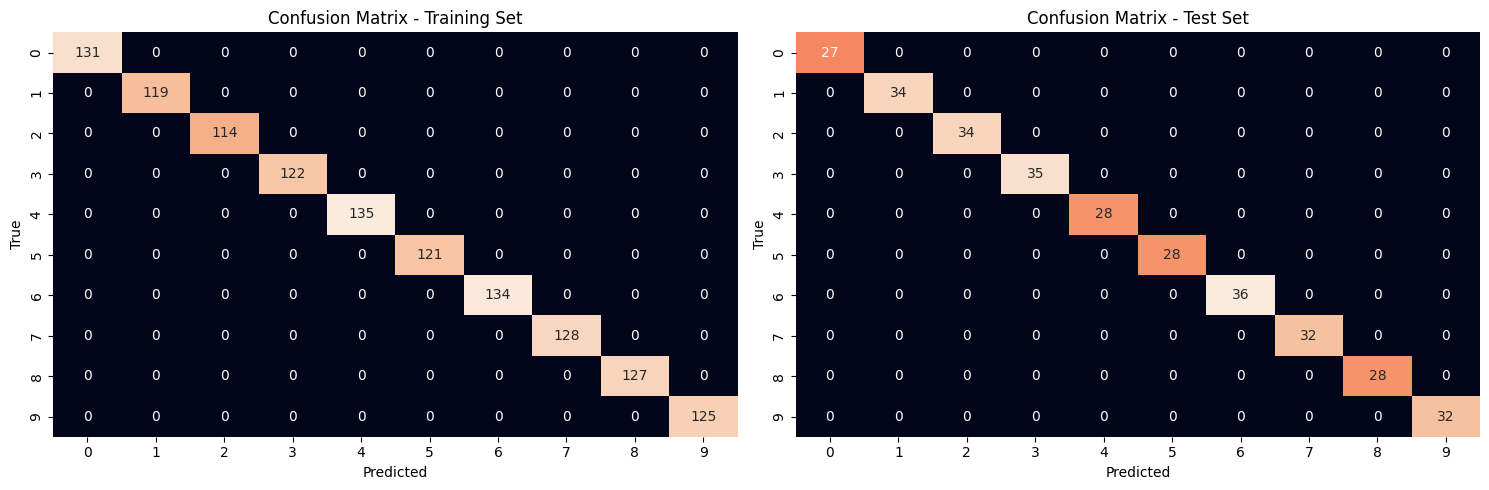

[Saved] /content/drive/MyDrive/C-Matrix.png


In [28]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from catboost import CatBoostClassifier, Pool


def _ensure_1d(y):
    y = np.array(y)
    return y.reshape(-1)


X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = _ensure_1d(y_train)
y_test_np = _ensure_1d(y_test)

classes = np.unique(y_train_np)
LOSS_FUNCTION = "Logloss" if len(classes) <= 2 else "MultiClass"

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
tr_idx, va_idx = next(sss.split(X_train_np, y_train_np))
X_tr, y_tr = X_train_np[tr_idx], y_train_np[tr_idx]
X_va, y_va = X_train_np[va_idx], y_train_np[va_idx]


search_space = {
    "iterations": list(range(50, 201, 25)),
    "depth": list(range(2, 9)),
    "learning_rate": [0.03, 0.05, 0.08, 0.1],
    "l2_leaf_reg": [1.0, 3.0, 5.0],
    "bagging_temperature": [0.5, 1.0, 1.5],
    "random_strength": [0.5, 1.0, 1.5],
}
keys = list(search_space.keys())


def project_to_space(key, value):
    choices = np.array(search_space[key], dtype=float)
    idx = int(np.argmin(np.abs(choices - float(value))))
    v = search_space[key][idx]
    if isinstance(search_space[key][0], int):
        return int(v)
    return float(v)


def clip_cast(p):
    out = {}
    for k in keys:
        out[k] = project_to_space(k, p[k])
    out["iterations"] = int(out["iterations"])
    out["depth"] = int(out["depth"])
    return out


def random_particle(rng):
    return {k: rng.choice(search_space[k]) for k in keys}


def particle_to_vector(p):
    return np.array([float(p[k]) for k in keys], dtype=float)


def vector_to_particle(v):
    return {k: float(v[i]) for i, k in enumerate(keys)}


def objective_fast(params, seed=42):
    model = CatBoostClassifier(
        iterations=int(params["iterations"]),
        depth=int(params["depth"]),
        learning_rate=float(params["learning_rate"]),
        l2_leaf_reg=float(params["l2_leaf_reg"]),
        bagging_temperature=float(params["bagging_temperature"]),
        random_strength=float(params["random_strength"]),
        loss_function=LOSS_FUNCTION,
        eval_metric="Accuracy",
        od_type="Iter",
        od_wait=20,
        verbose=False,
        random_seed=seed,
        thread_count=-1
    )
    model.fit(X_tr, y_tr, eval_set=(X_va, y_va), use_best_model=True)
    pred = model.predict(X_va).reshape(-1)
    return float(accuracy_score(y_va, pred))


def cauchy_mutation(particle, rng, gamma=0.25):
    mutated = dict(particle)
    for k in keys:
        mutated[k] = float(mutated[k]) * (1.0 + gamma * np.tan(np.pi * (rng.random() - 0.5)))
        mutated[k] = project_to_space(k, mutated[k])
    return clip_cast(mutated)


def hs_pso_optimize_fast(
    n_part=10,
    max_iter=15,
    switch_threshold=5,
    seed=42,
    w_min=0.5, w_max=0.9,
    c1=0.8, c2=0.6,
    mutation_prob=0.15,
    restart_prob=0.08,
    target_acc=0.999
):
    rng = np.random.default_rng(seed)
    dim = len(keys)

    swarm = [random_particle(rng) for _ in range(n_part)]
    vel = [np.zeros(dim, dtype=float) for _ in range(n_part)]

    pbest = [dict(s) for s in swarm]
    pbest_score = [objective_fast(s, seed=seed) for s in swarm]

    gbest_idx = int(np.argmax(pbest_score))
    gbest = dict(pbest[gbest_idx])
    gbest_score = float(pbest_score[gbest_idx])

    topology = "gbest"
    H = 1.0
    b = 0.9

    def nonlinear_inertia(it):
        numerator = (w_max - w_min) * it
        denominator = 1.0 + np.exp(-10.0 * b * ((2.0 * it) / (H * max_iter) - 1.0))
        return w_max - numerator / denominator

    for it in range(1, max_iter + 1):
        if gbest_score >= target_acc:
            break

        w = nonlinear_inertia(it)

        if it % switch_threshold == 0:
            topology = "lbest" if topology == "gbest" else "gbest"

        scores = []
        for i in range(len(swarm)):
            s = objective_fast(swarm[i], seed=seed)
            scores.append(s)
            if s > pbest_score[i]:
                pbest[i] = dict(swarm[i])
                pbest_score[i] = float(s)

        best_i = int(np.argmax(pbest_score))
        if pbest_score[best_i] > gbest_score:
            gbest = dict(pbest[best_i])
            gbest_score = float(pbest_score[best_i])

        best_indices = np.argsort(scores)[-max(1, len(swarm)//5):]
        for idx in best_indices:
            swarm.append(dict(swarm[idx]))
            vel.append(vel[idx].copy())
            scores.append(scores[idx])
            pbest.append(dict(pbest[idx]))
            pbest_score.append(float(pbest_score[idx]))

        if len(swarm) > 2 * n_part:
            worst_indices = np.argsort(scores)[:len(swarm)//4]
            for idx in sorted(worst_indices, reverse=True):
                del swarm[idx]
                del vel[idx]
                del scores[idx]
                del pbest[idx]
                del pbest_score[idx]

        for i in range(len(swarm)):
            x_vec = particle_to_vector(swarm[i])
            p_vec = particle_to_vector(pbest[i])

            if topology == "gbest":
                g_vec = particle_to_vector(gbest)
            else:
                k = min(5, len(swarm))
                neigh = rng.choice(len(swarm), size=k, replace=False)
                neigh_best = neigh[np.argmax([pbest_score[j] for j in neigh])]
                g_vec = particle_to_vector(pbest[neigh_best])

            r1 = rng.random(dim)
            r2 = rng.random(dim)

            vel[i] = w * vel[i] + c1 * r1 * (p_vec - x_vec) + c2 * r2 * (g_vec - x_vec)
            new_vec = x_vec + vel[i]
            swarm[i] = clip_cast(vector_to_particle(new_vec))

        for i in range(len(swarm)):
            if rng.random() < mutation_prob:
                swarm[i] = cauchy_mutation(swarm[i], rng, gamma=0.25)

        for i in range(len(swarm)):
            if rng.random() < restart_prob:
                swarm[i] = random_particle(rng)

    return gbest, gbest_score


start_time = datetime.now()
best_params, best_val_acc = hs_pso_optimize_fast()
end_time = datetime.now()

print("Tuning Duration:", end_time - start_time)
print("Best Val Accuracy:", best_val_acc)
print("Best Parameters:", best_params)

# =========================
# Pools
# =========================
train_pool = Pool(X_train_np, y_train_np)
test_pool  = Pool(X_test_np,  y_test_np)

# =========================
# Final model：固定 1000 iterations + Metric Value Learning Curve
# =========================
final_iterations = 1000

# 你要的 y 軸是 metric value（像你舊圖 Training MultiClass Metric）
# binary -> Logloss；multi-class -> MultiClass
eval_metric_curve = "Logloss" if len(classes) <= 2 else "MultiClass"

final_model = CatBoostClassifier(
    iterations=final_iterations,                  # ✅ 固定 1000
    depth=int(best_params["depth"]),
    learning_rate=float(best_params["learning_rate"]),
    l2_leaf_reg=float(best_params["l2_leaf_reg"]),
    bagging_temperature=float(best_params["bagging_temperature"]),
    random_strength=float(best_params["random_strength"]),
    loss_function=LOSS_FUNCTION,
    eval_metric=eval_metric_curve,                # ✅ Metric Value 曲線來源
    od_type="Iter",
    od_wait=40,
    verbose=50,
    random_seed=42,
    thread_count=-1
)

# ✅ 為了讓曲線一定到 1000，不要 use_best_model=True
final_model.fit(train_pool, eval_set=test_pool, use_best_model=False)

# =========================
# 取出 learning curve（Metric Value）
# =========================
curve = final_model.get_evals_result()
train_metric = curve.get("learn", {}).get(eval_metric_curve, [])
val_metric   = curve.get("validation", {}).get(eval_metric_curve, [])

# 保險：若長度不足 1000，用最後一筆補齊（避免你看圖斷掉）
def pad_to_L(arr, L):
    arr = np.array(arr, dtype=float)
    if len(arr) == 0:
        return np.zeros(L, dtype=float)
    if len(arr) < L:
        arr = np.r_[arr, np.full(L - len(arr), arr[-1])]
    return arr[:L]

train_metric = pad_to_L(train_metric, final_iterations)
val_metric   = pad_to_L(val_metric, final_iterations)

x = np.arange(final_iterations)

# =========================
# 存 CSV 到 Google Drive
# =========================
import pandas as pd
df_curve = pd.DataFrame({
    "Iteration": x,
    f"Train_{eval_metric_curve}": train_metric,
    f"Val_{eval_metric_curve}": val_metric
})
csv_path = "/content/drive/MyDrive/HSPSO_metric_curve_1000.csv"
df_curve.to_csv(csv_path, index=False)
print("[Saved]", csv_path)

# =========================
# 畫 Learning Curve（照你舊圖：y=Metric Value）
# =========================
plt.figure(figsize=(6,4), dpi=600)
plt.plot(x, train_metric, label=f"Training {eval_metric_curve} Metric")
plt.plot(x, val_metric,   label=f"Validation {eval_metric_curve} Metric")
plt.xlabel("Iterations")
plt.ylabel("Metric Value")
plt.title("Learning Curve")
plt.grid(True)
plt.legend()
plt.tight_layout()

png_path = "/content/drive/MyDrive/HSPSO_metric_curve_1000.png"
plt.savefig(png_path, dpi=600, bbox_inches="tight")
plt.show()
print("[Saved]", png_path)

# =========================
# 下面保留你原本 accuracy 的輸出（分類報告 + 混淆矩陣）
# =========================
y_pred_train = final_model.predict(X_train_np).reshape(-1)
y_pred_test  = final_model.predict(X_test_np).reshape(-1)

print("Classification Report - Training Set:")
print(classification_report(y_train_np, y_pred_train))
print("Classification Report - Test Set:")
print(classification_report(y_test_np, y_pred_test))

cm_train = confusion_matrix(y_train_np, y_pred_train)
cm_test  = confusion_matrix(y_test_np, y_pred_test)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.heatmap(cm_train, annot=True, fmt="d", cbar=False)
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(1,2,2)
sns.heatmap(cm_test, annot=True, fmt="d", cbar=False)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()

cm_path = "/content/drive/MyDrive/C-Matrix.png"
plt.savefig(cm_path, dpi=600, bbox_inches="tight")
plt.show()
print("[Saved]", cm_path)


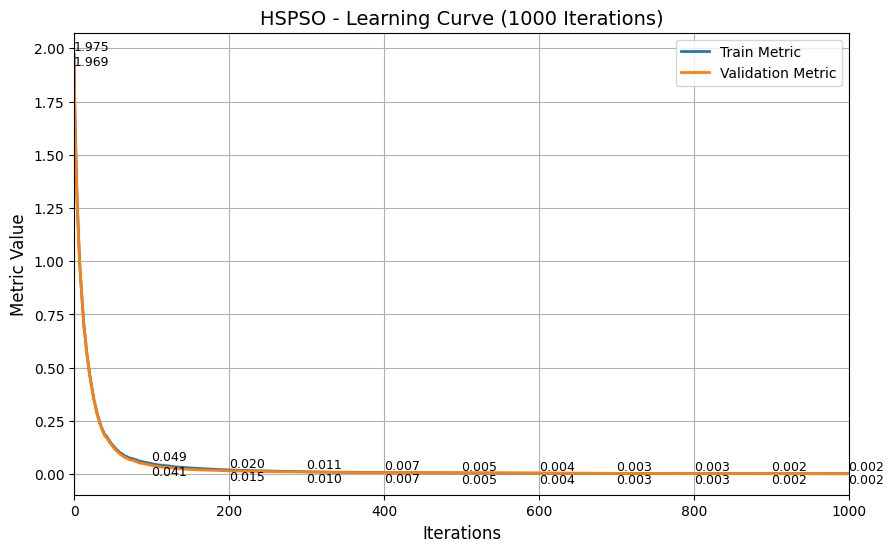

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# 取得結果
curve = final_model.get_evals_result()

train_metric = curve.get("learn", {}).get(LOSS_FUNCTION, [])
val_metric = curve.get("validation", {}).get(LOSS_FUNCTION, [])

iterations = len(train_metric)
x = np.arange(iterations)

plt.figure(figsize=(10,6))

# 畫線
if train_metric:
    plt.plot(x, train_metric, label="Train Metric", linewidth=2)

if val_metric:
    plt.plot(x, val_metric, label="Validation Metric", linewidth=2)

# ===== 每 100 次標一次 =====
for i in range(0, iterations, 100):
    if train_metric:
        plt.text(i, train_metric[i],
                 f"{train_metric[i]:.3f}",
                 fontsize=9,
                 verticalalignment='bottom')

    if val_metric:
        plt.text(i, val_metric[i],
                 f"{val_metric[i]:.3f}",
                 fontsize=9,
                 verticalalignment='top')

# 如果最後不是剛好 1000，也補最後一點
if iterations-1 not in range(0, iterations, 100):
    i = iterations - 1
    if train_metric:
        plt.text(i, train_metric[i],
                 f"{train_metric[i]:.3f}",
                 fontsize=9,
                 verticalalignment='bottom')
    if val_metric:
        plt.text(i, val_metric[i],
                 f"{val_metric[i]:.3f}",
                 fontsize=9,
                 verticalalignment='top')

# 標籤設定
plt.xlabel("Iterations", fontsize=12)
plt.ylabel("Metric Value", fontsize=12)
plt.title("HSPSO - Learning Curve (1000 Iterations)", fontsize=14)
plt.legend()
plt.grid(True)

plt.xlim(0, 1000)

plt.show()



In [29]:
learning_curve = final_model.get_evals_result()
print(learning_curve)

{'learn': {'MultiClass': [1.9747098954563818, 1.7201390759188055, 1.5533305004662434, 1.413280664442292, 1.2848693510335611, 1.1936704365562933, 1.0951069427441866, 1.0110147049489744, 0.9475942507480469, 0.8936963759368506, 0.8357972552318718, 0.7874080603930131, 0.7344039033800068, 0.687378099926318, 0.6577718176146621, 0.6204710703262488, 0.5847130896259203, 0.5540105890475275, 0.5291634082759811, 0.5015372077467166, 0.4710340466004022, 0.4528091658311922, 0.4290809746588908, 0.40882150128716677, 0.38722671210044957, 0.36503500523497934, 0.3452881203567884, 0.3306294635689232, 0.313006926902601, 0.29650910614578785, 0.2828030562126077, 0.270103291877833, 0.25766737800635214, 0.24670161031534235, 0.23519608702961162, 0.2251674179158646, 0.21561564517117063, 0.2061991508778689, 0.19860451482639868, 0.19147006635370625, 0.1836299320624888, 0.1804278437378222, 0.1787571347072217, 0.17230197525978935, 0.16522522382049706, 0.16092960373758072, 0.15492415860706932, 0.14967885429878178, 0.1

In [30]:
# Retrieve evaluation results
learning_curve = final_model.get_evals_result()

# Extract the metric values
# Assuming 'learn' corresponds to the training dataset
train_metric_values = learning_curve.get('learn', {}).get('MultiClass', [])

# Check the extracted values
if train_metric_values:
    print("Training metric values:", train_metric_values)
else:
    print("Metric 'MultiClass' not found in evaluation results.")


Training metric values: [1.9747098954563818, 1.7201390759188055, 1.5533305004662434, 1.413280664442292, 1.2848693510335611, 1.1936704365562933, 1.0951069427441866, 1.0110147049489744, 0.9475942507480469, 0.8936963759368506, 0.8357972552318718, 0.7874080603930131, 0.7344039033800068, 0.687378099926318, 0.6577718176146621, 0.6204710703262488, 0.5847130896259203, 0.5540105890475275, 0.5291634082759811, 0.5015372077467166, 0.4710340466004022, 0.4528091658311922, 0.4290809746588908, 0.40882150128716677, 0.38722671210044957, 0.36503500523497934, 0.3452881203567884, 0.3306294635689232, 0.313006926902601, 0.29650910614578785, 0.2828030562126077, 0.270103291877833, 0.25766737800635214, 0.24670161031534235, 0.23519608702961162, 0.2251674179158646, 0.21561564517117063, 0.2061991508778689, 0.19860451482639868, 0.19147006635370625, 0.1836299320624888, 0.1804278437378222, 0.1787571347072217, 0.17230197525978935, 0.16522522382049706, 0.16092960373758072, 0.15492415860706932, 0.14967885429878178, 0.14

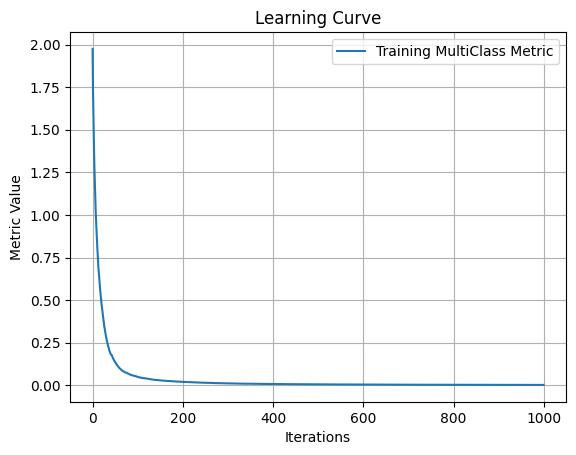

In [31]:
import matplotlib.pyplot as plt

# Plotting the learning curve
plt.plot(train_metric_values, label='Training MultiClass Metric')
plt.xlabel('Iterations')
plt.ylabel('Metric Value')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()


Classification Report - Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       119
           2       1.00      1.00      1.00       114
           3       1.00      1.00      1.00       122
           4       1.00      1.00      1.00       135
           5       1.00      1.00      1.00       121
           6       1.00      1.00      1.00       134
           7       1.00      1.00      1.00       128
           8       1.00      1.00      1.00       127
           9       1.00      1.00      1.00       125

    accuracy                           1.00      1256
   macro avg       1.00      1.00      1.00      1256
weighted avg       1.00      1.00      1.00      1256

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        34
      

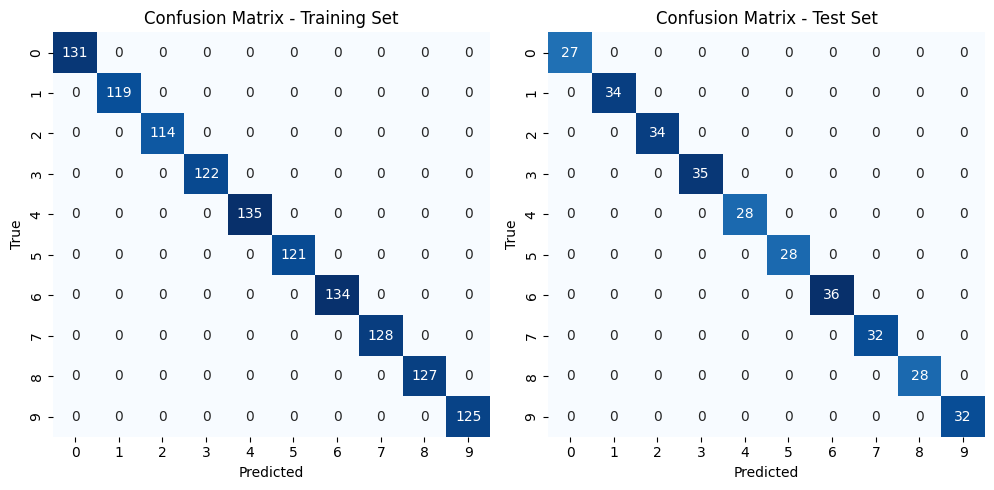

Deployment Duration: 0:01:16.903454


In [32]:
# Predictions
y_pred_train = final_model.predict(X_train)
y_pred_test = final_model.predict(X_test)

print("Classification Report - Training Set:")
print(classification_report(y_train, y_pred_train))

print("Classification Report - Test Set:")
print(classification_report(y_test, y_pred_test))

conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()
plt.savefig('C-Matrix.svg', format='svg')
plt.show()

end_time = datetime.now()
print('Deployment Duration: {}'.format(end_time - start_time))